# Auswertung 200218_1 0-5000

### imports

In [145]:
import sys
sys.path.append("../toolbox/")
from workflow  import *

In [52]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [193]:
%autoreload

## define master data

In [6]:
measurement_id = "200218_1"
campaign_id    = "01_Messkampagne_1"
path_to_raw_data_folder = "C:\\Users\\joerg_j\\switchdrive\\PSI\\22_e-Instrumentation\\HERO\\IPA\\Rohdaten"
path_to_hdf5_folder = "HDF5"

In [7]:
rawfolder, hdf5file = paths(measurement_id, campaign_id, path_to_raw_data_folder, path_to_hdf5_folder)

### import data

In [8]:
traceName = "Trace"
pulseMin = None
pulseMax = 5000


C1 = readChannel("C1", rawfolder, traceName, pulseMin, pulseMax)
C3 = readChannel("C3", rawfolder, traceName, pulseMin, pulseMax)

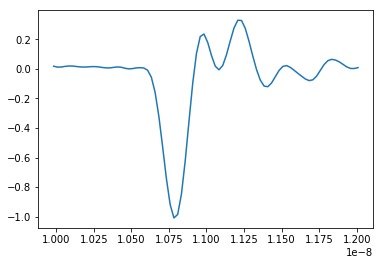

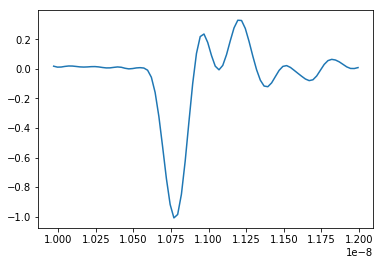

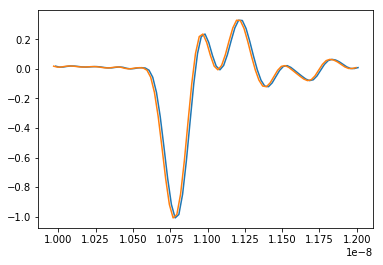

In [9]:
pulsnr = 123
viewImport(C1, C3, pulsnr)

### define area of interest

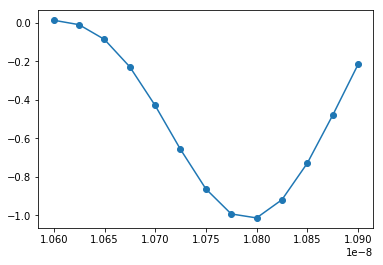

In [10]:
areaMinC1 = 25
areaMaxC1 = 38
pulsnr = 125

viewSelection(C1, pulsnr, areaMinC1, areaMaxC1)

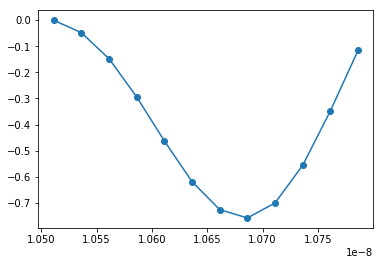

In [11]:
areaMinC3 = 22
areaMaxC3 = 34
pulsnr = 125

viewSelection(C3, pulsnr, areaMinC3, areaMaxC3)

## algorithm 1: fit gaussian function

In [12]:
# [A, mu, sigma]
gaussParamsC1 = [-1.5e-11, 1.078e-8, 5e-11]
gaussParamsC3 = [-1.0e-11, 1.07e-8, 5e-11]

In [13]:
C1["fit"] = fitChannel(C1["data"], areaMinC1, areaMaxC1, gaussParamsC1)

In [14]:
C3["fit"] = fitChannel(C3["data"], areaMinC3, areaMaxC3, gaussParamsC3)

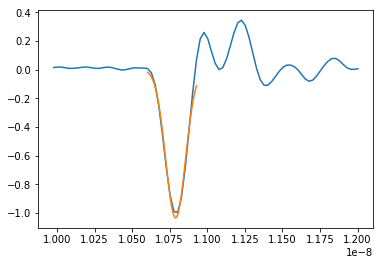

parameter: [-1.70611923e-10  1.07895708e-08  6.58523452e-11] [A, mu, sigma]


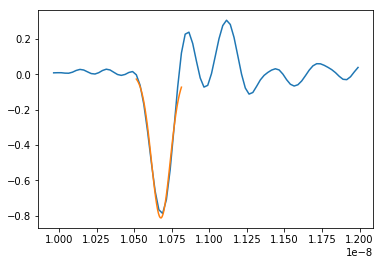

parameter: [-1.26770728e-10  1.06777114e-08  6.22595498e-11] [A, mu, sigma]


In [15]:
pulsnr = 125

viewFit(C1, pulsnr, areaMinC1, areaMaxC1, gaussParamsC1)
viewFit(C3, pulsnr, areaMinC3, areaMaxC3, gaussParamsC3)

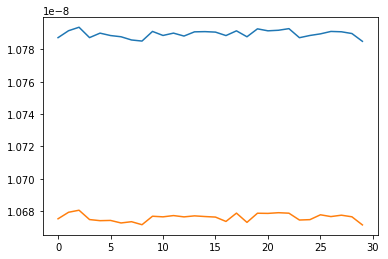

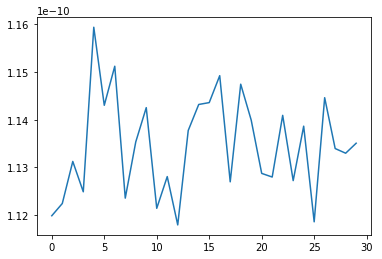

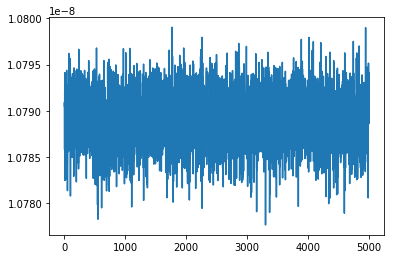

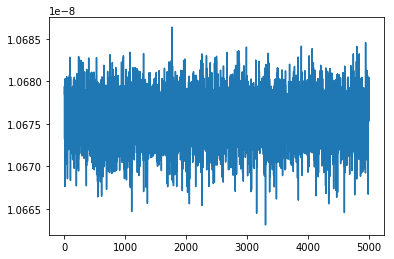

In [16]:
pulseMin = 100
pulseMax = 130

viewMu(C1, C3, pulseMin, pulseMax)

### histogram

In [17]:
JitterGauss = jitter(C1, C3, axis = 1)

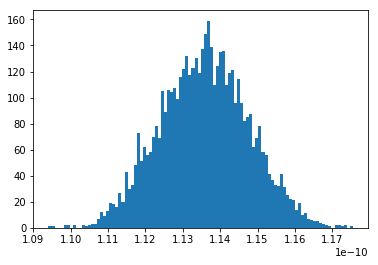

In [178]:
bins = 100

HistGauss = histogram(JitterGauss, bins)

### fit gauss to histogram

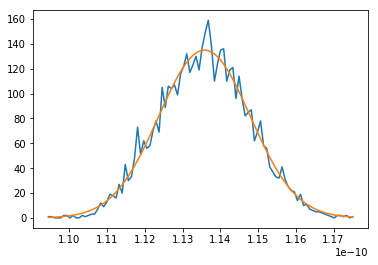

parameter: [4.10188404e-10 1.13579472e-10 1.21232456e-12] [A, mu, sigma]


In [186]:
# [A, mu, sigma]
gaussParamsHist = [1e-9, 1.14e-10, 1e-12]

HistFitParamsGauss = fitSingle(np.array([HistGauss[0], HistGauss[1]]), None, None, gaussParamsHist)

### result GAUSSFIT

In [187]:
DoubleJitter, SingleJitter, Mu = result(HistFitParamsGauss)

σ_0: 1.2123245624067307 ps
σ_1: 0.8572429190768132 ps
σ_1 = σ_0 / sqrt(2)

μ: 113.57947179371493 ps

coma separated [σ_0, σ_1, μ]
1.2123245624067308e-12,8.572429190768131e-13,1.1357947179371494e-10

 tab separated [σ_0, σ_1, μ]
1.2123245624067308e-12	8.572429190768131e-13	1.1357947179371494e-10


## algorithm 2: min

In [61]:
C1["min"] = minChannel(C1)
C3["min"] = minChannel(C3)

## algorithm 3: threshold

In [158]:
factor = 0.5

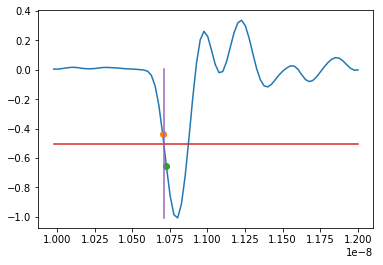

xt: 1.0709631941087914e-08 ps, yt -0.5034562090004329 ps


In [195]:
C1["thres5f"] = threshold(C1, factor, show=120)

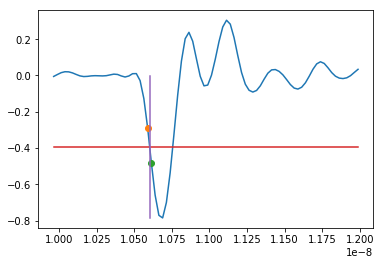

xt: 1.0601804078488857e-08 ps, yt -0.39231655263574794 ps


In [196]:
C3["thres5f"] = threshold(C3, factor, show=120)

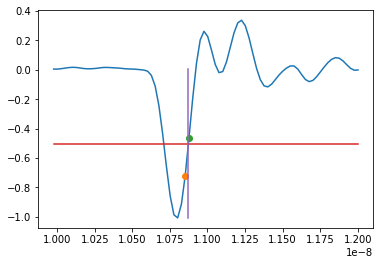

xt: 1.0873207038152618e-08 ps, yt -0.5034562090004329 ps


In [197]:
C1["thres5r"] = threshold(C1, factor, fallingEdge = False, show=120)

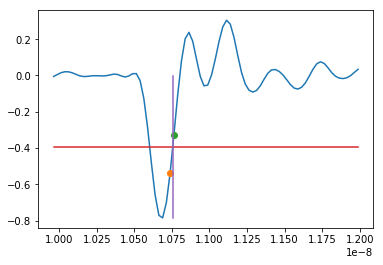

xt: 1.0755420542537187e-08 ps, yt -0.39231655263574794 ps


In [198]:
C3["thres5r"] = threshold(C3, factor, fallingEdge = False, show=120)

In [210]:
C1["thres5c"] = (C1["thres5r"] + C1["thres5f"]) / 2
C3["thres5c"] = (C3["thres5r"] + C3["thres5f"]) / 2

### histogram

In [211]:
JitterThres5f = jitter(C1, C3, storage = "thres5f", axis = 0)
JitterThres5c = jitter(C1, C3, storage = "thres5c", axis = 0)
JitterThres5r = jitter(C1, C3, storage = "thres5r", axis = 0)

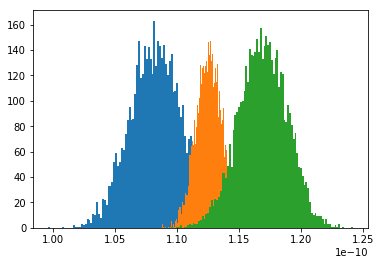

In [212]:
bins = 100

HistThres5f = histogram(JitterThres5f, bins)
HistThres5c = histogram(JitterThres5c, bins)
HistThres5r = histogram(JitterThres5r, bins)

### fit gauss to histogram

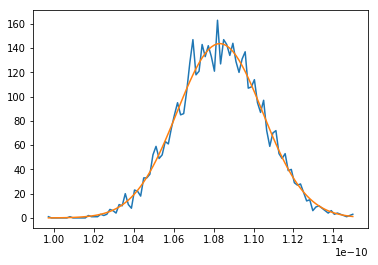

parameter: [7.72820570e-10 1.08312942e-10 2.14465520e-12] [A, mu, sigma]


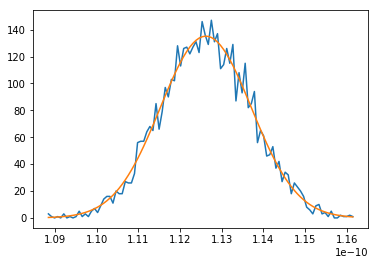

parameter: [3.70285356e-10 1.12618657e-10 1.09286285e-12] [A, mu, sigma]


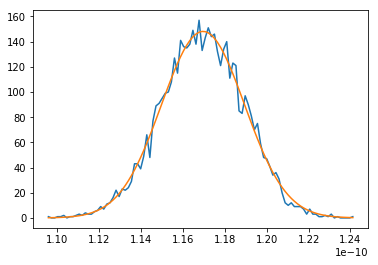

parameter: [7.36501257e-10 1.16964170e-10 1.98329053e-12] [A, mu, sigma]


In [213]:
# [A, mu, sigma]
gaussParamsThres5 = [1e-9, 1.14e-10, 1e-12]

HistFitParamsThres5f = fitSingle(np.array([HistThres5f[0], HistThres5f[1]]), None, None, gaussParamsThres5)
HistFitParamsThres5c = fitSingle(np.array([HistThres5c[0], HistThres5c[1]]), None, None, gaussParamsThres5)
HistFitParamsThres5r = fitSingle(np.array([HistThres5r[0], HistThres5r[1]]), None, None, gaussParamsThres5)

### result

In [214]:
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5f)

σ_0: 2.144655201200873 ps
σ_1: 1.5165002360761368 ps
σ_1 = σ_0 / sqrt(2)

μ: 108.31294236845656 ps

coma separated [σ_0, σ_1, μ]
2.144655201200873e-12,1.5165002360761368e-12,1.0831294236845656e-10

 tab separated [σ_0, σ_1, μ]
2.144655201200873e-12	1.5165002360761368e-12	1.0831294236845656e-10


In [215]:
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5c)

σ_0: 1.0928628451719813 ps
σ_1: 0.772770728727932 ps
σ_1 = σ_0 / sqrt(2)

μ: 112.61865690372746 ps

coma separated [σ_0, σ_1, μ]
1.0928628451719813e-12,7.727707287279319e-13,1.1261865690372746e-10

 tab separated [σ_0, σ_1, μ]
1.0928628451719813e-12	7.727707287279319e-13	1.1261865690372746e-10


In [218]:
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5r)

σ_0: 1.9832905254466369 ps
σ_1: 1.4023981796063478 ps
σ_1 = σ_0 / sqrt(2)

μ: 116.96417013206269 ps

coma separated [σ_0, σ_1, μ]
1.9832905254466368e-12,1.4023981796063478e-12,1.1696417013206269e-10

 tab separated [σ_0, σ_1, μ]
1.9832905254466368e-12	1.4023981796063478e-12	1.1696417013206269e-10
